In [33]:
# Jonny tf runs
import numpy as np
from framework import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The data is of size
X: (400, 2) , y (400,)
------------------------------------------------------------


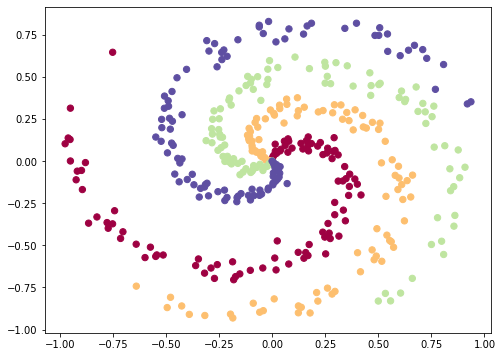

In [34]:
# As an example, we will illustrate this framework using the spiral
# dataset (taken from Karpathy). It can be generated and visualized as follows
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

N = 100 # number of points per class
D = 2 # dimensionality
K = 4 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*(K+1),(j+1)*(K+1),N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

feed_dict = {'X':X, 'y':y}
print("The data is of size")
print("X:",X.shape, ", y",y.shape)
print('-'*60)
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

Since we know the distribution and can easily visualize it,
we will not use a training/test split, regularization, or 
batches (the set is only 400 long). Those will be illustrated in
a future implementation. We now show how easily we can train a two-layer neural network to fit the above dataset.

All sessions must begin with the Graph() instantiation, which resets the current computation graph. We then write in all of the variables, and the corresponding operations on those variables. We keep placeholders for input data X and y that changes during training. Variables are the parameters of the model that will be trained. Constants are just constants. They are not trained, or changed in any way once specified.

In [35]:
# initialize graph
g = Graph()

# write steps of neural net. Important, we must make sure
# all placeholders have the same name as they do in feed_dict

H = 20
X_train = Placeholder('X')
W1 = Variable(np.random.randn(2,H), 'W1')
W2 = Variable(np.random.randn(H,K), 'W2')
b1 = Variable(np.zeros(H), 'b1')
b2 = Variable(np.zeros(K), 'b2')
y_train = Placeholder('y')
z1 = affine(X_train, W1, b1)
a1 = relu(z1)
scores = affine(a1, W2, b2)
J = softmax_loss(scores, y_train)

In [36]:
sess = Session()
sess.order

[affine, relu, affine, softmax_loss]

In [37]:
sess = Session()
loss_history = []
for i in range(10000):
    loss = sess.forward(J, feed_dict=feed_dict)
    loss_history.append(loss)
    sess.backward()
    sess.update(lr=1e-1)
    if i % 1000 == 0:
        print(f"iteration {i}/{10000}. Loss = {loss}")

iteration 0/10000. Loss = 3.419576755828268
iteration 1000/10000. Loss = 0.6785743225848413
iteration 2000/10000. Loss = 0.46474061421451823
iteration 3000/10000. Loss = 0.34889109440657057
iteration 4000/10000. Loss = 0.2714059961857693
iteration 5000/10000. Loss = 0.22191992089047333
iteration 6000/10000. Loss = 0.18732741069733563
iteration 7000/10000. Loss = 0.1631709458040506
iteration 8000/10000. Loss = 0.14624722859729292
iteration 9000/10000. Loss = 0.13360754496088847


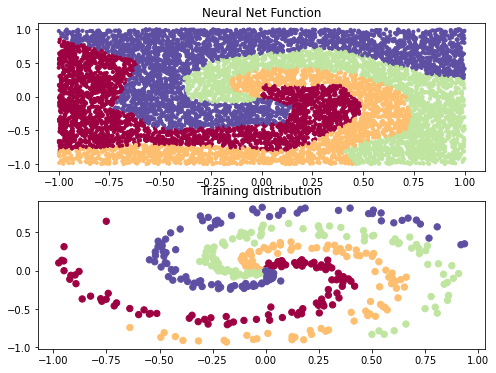

In [39]:
npts=10000
X_rand = 2*np.random.rand(npts,2)-1
color = np.argmax(sess.forward(scores, feed_dict={'X':X_rand,'y':y}), axis=1)

plt.subplot(2,1,1)
plt.scatter(X_rand[:, 0], X_rand[:, 1], c=color, s=10, cmap=plt.cm.Spectral)
plt.title('Neural Net Function')

plt.subplot(2,1,2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.title('Training distribution')

plt.show()


In [41]:
g.variables

[W1, W2, b1, b2]

In [27]:
def predict(x):
    d = {'X':x, 'y_train':y}
    probs = sess.forward(scores, feed_dict=d) 
    return np.argmax(probs, axis=1)
predict(X)

KeyError: 'y'

In [176]:
np.sum(np.argmax(scores.output, axis=1)==y)/len(y)

0.7625

In [132]:
sess.forward(feed_dict=feed_dict)

(400, 4)

In [133]:
y_train.output.shape

(400,)

In [43]:
sess.forward(feed_dict=feed_dict)

NameError: name '_g' is not defined

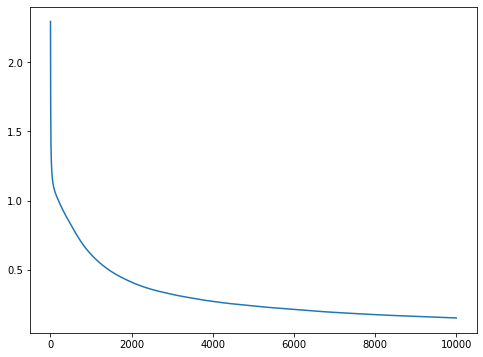

In [193]:
plt.plot(loss_history)

In [5]:
sess = Session()
feed_dict = {'X':X, 'y':y}
sess.run(feed_dict=feed_dict)

NameError: name '_g' is not defined

In [ ]:
# Graph()
# val1=2
# a = Variable(val1, name='a')
# b = multiply(a,a)
# c = multiply(b,a)
# sess = Session()
# print(sess.order)
# sess.forward_prop()
# sess.back_prop()
# val3 = a.gradient
# val2 = a.gradient/b.gradient
# print(f"f(x) = x^3, f'(x) = 3x^2, f''(x)=6x.") 
# print(f"f'(2)=12={val3}")
# print(f"f(2)=8={val1}")

In [204]:
npts=10000
X_rand = 2*np.random.rand(npts,2)-1
prob = sess.forward(scores, feed_dict={'X_train':X_rand})
color=np.argmax(prob, axis=1)

plt.subplot(2,1,1)
plt.scatter(X_rand[:, 0], X_rand[:, 1], c=color, s=10, cmap=plt.cm.Spectral)
plt.title('Neural Net Function')

plt.subplot(2,1,2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.title('Training distribution')

plt.show()

KeyError: 'y_train'